In [1]:
import pandas as pd
from scipy.cluster.vq import kmeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_json("data/cluster_data.json")

In [3]:
df

,glass_encoded,Soda water,Light Rum,Lime,Mint,Sugar,Water,Angostura Bitters,Bourbon,lemon,...,Green Chartreuse,Drambuie,Orgeat Syrup,Grapefruit Juice,Red Wine,Raspberry syrup,Sherry,Coffee Brandy,Lime vodka,Lemon-lime soda
0,5,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
130,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
131,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
132,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
potencjalne_klastry = range(2, 20)
łokieć = []
for k in potencjalne_klastry:
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=5)
    kmeans.fit(df)
    łokieć.append(kmeans.inertia_)

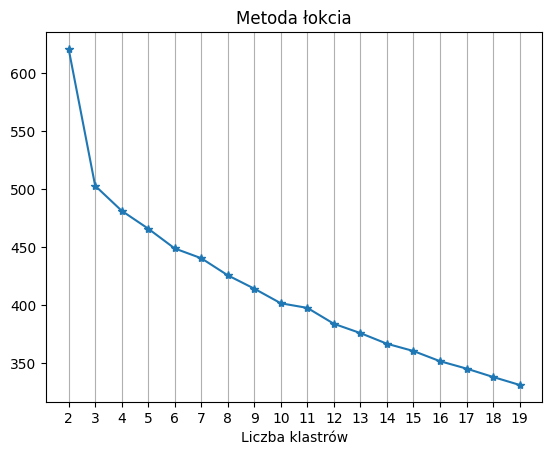

In [5]:
plt.plot(potencjalne_klastry, łokieć, marker="*")
plt.xlabel("Liczba klastrów")
plt.title("Metoda łokcia")
plt.grid(True, axis="x")
plt.xticks(range(2, 20, 1))
plt.show()

**Widzimy łokieć dla 3 klastrów, poniżej wynik silhouette oceniający klastrację
jego zakres to od -1 (źle) do 1 (dobrze)**

In [6]:
ilosc_klastow = 3
kmeans = KMeans(n_clusters=ilosc_klastow, random_state=1, n_init=50)
df["Klaster"] = kmeans.fit_predict(df)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop("Klaster", axis=1))
float(silhouette_score(df, df["Klaster"]))

0.37894854652926413

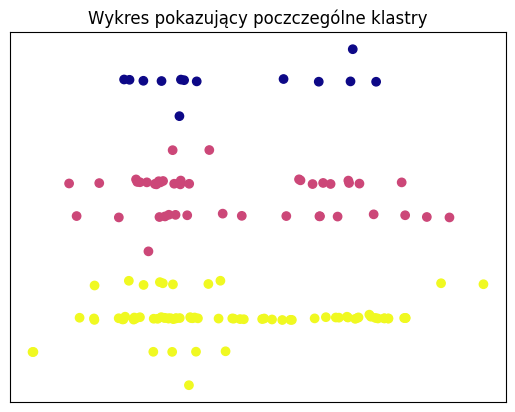

In [7]:
plt.scatter(df_pca[:, 1], df_pca[:, 0], c=df["Klaster"], cmap="plasma", marker="o")
plt.xticks([])
plt.yticks([])
plt.title("Wykres pokazujący poczczególne klastry")
plt.show()